4.1 Plot the potential of the harmonic oscillator
with some different values for the force constant k.

In [381]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [382]:
# constants
k_B = 1
T = 300
k = 1
x_extrema = 100
x_min, x_max = -x_extrema, x_extrema
x = np.linspace(-x_min, x_max, 400)
spring_constants = [0.5, 1, 2]
temperatures = [100, 300, 1000]


Define functions, V and P

In [383]:
# Potential energy function, V(x)
def V(x, k):
    return 0.5 * k * x**2

# Probability distribution function, P(x)
def P(x, k, T):
    return np.sqrt(k / (2 * np.pi * k_B * T)) * np.exp(-0.5 * (k * x**2) / (k_B * T))  # prob density


Plots

Value of P at x=[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5

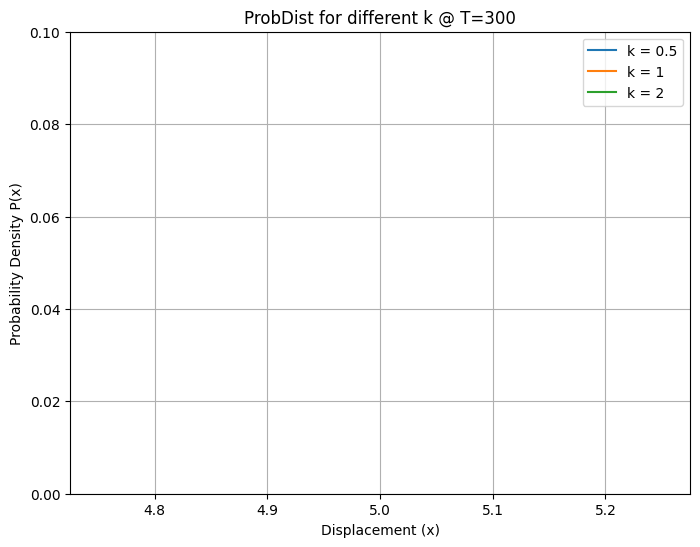

In [395]:
plt.figure(figsize=(8, 6))
for k in spring_constants:
    plt.plot(x, P(x, k, T), label=f'k = {k}')
    print(f"Value of P at x={x} {P(x,k,T)}")
plt.xlabel('Displacement (x)')
plt.ylabel('Probability Density P(x)')
plt.title('ProbDist for different k @ T=300')
plt.xlim((None, None))
plt.ylim((0, 1e-1))
plt.grid(True)
plt.legend()
plt.savefig('classical_prob_dist_multiple_k.png')
plt.show()

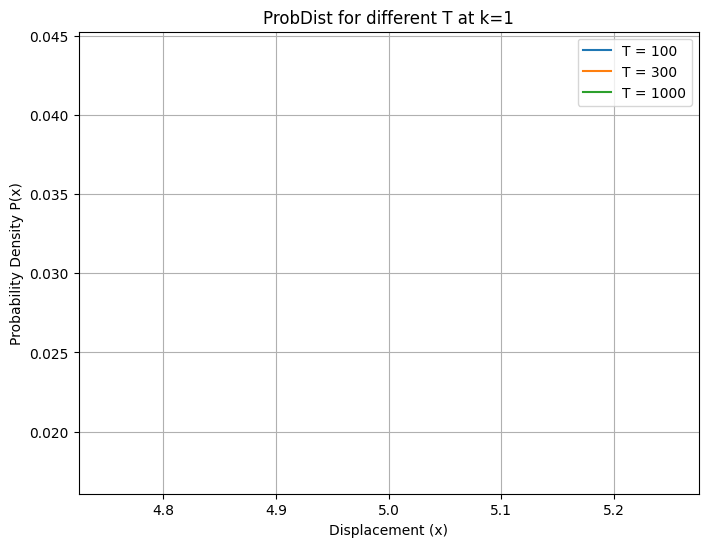

In [385]:
plt.figure(figsize=(8, 6))
for T in temperatures:
    plt.plot(x, P(x, k, T), label=f'T = {T}')

plt.xlabel('Displacement (x)')
plt.ylabel('Probability Density P(x)')
plt.title('ProbDist for different T at k=1')
# plt.ylim((0, 0.02))
plt.grid(True)
plt.legend()
plt.savefig('classical_prob_dist_multiple_k.png')
plt.show()

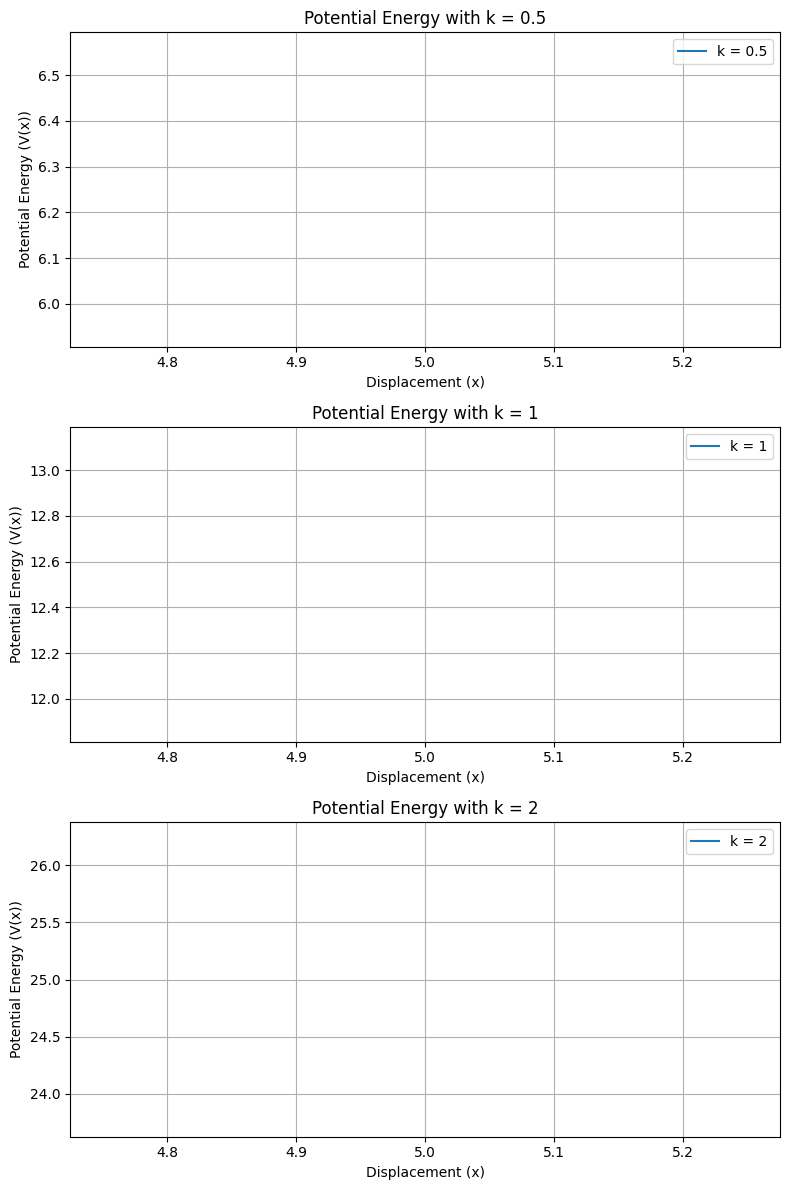

In [386]:
# Plot potential energies for different spring constants
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

for i, k in enumerate(spring_constants):
    V_values = V(x, k)
    axs[i].plot(x, V_values, label=f'k = {k}')
    axs[i].set_title(f'Potential Energy with k = {k}')
    axs[i].set_xlabel('Displacement (x)')
    axs[i].set_ylabel('Potential Energy (V(x))')
    axs[i].grid(True)
    # axs[i].set_xlim(x_range)
    # axs[i].set_ylim(y_range)
    axs[i].legend()

plt.tight_layout()
plt.savefig('HO_pot.png')
plt.show()


In [387]:
T = 300
# integrand for thermally averaged potential energy
def integrand(x):
    return V(x,k) * P(x,k,T)


# perform int
thermal_avg_V, _ = quad(integrand, x_min, x_max)

print(f"Thermally averaged potential energy at T=300K, k=1: {thermal_avg_V} J")

Thermally averaged potential energy at T=300K, k=1: 2.5826890485448044 J


4.2 Direct Monte Carlo sampling
Evaluate the thermally avg pot energy by MC sampling.
Use a constant probability dist in a finite range as a known dist.

In [388]:
# direct Monte Carlo sampling using C = 0.1
def direct_MC_sampling(k,T,x_min,x_max,num_samples):
    accepted_samples = []
    total_samples = 0

    C = 0.1 #P(x_min,T) 
    print(f"C = {C}")

    while len(accepted_samples) < num_samples:
        x_i = np.random.uniform(x_min,x_max)
        RND = np.random.rand()
        total_samples += 1
        if RND <= P(x_i,k, T) / C:
            accepted_samples.append(x_i)
        rejection_rate = 1 - len(accepted_samples) / total_samples
        # print(f"Accepted samples: {len(accepted_samples)}")
        # print(f"Total samples: {total_samples}")
    print(f"Rejection Rate: {rejection_rate:.2%}")
    return np.array(accepted_samples)

In [389]:
x0 = 0.0
def direct_sampling(k,T,x_min,x_max,N=100000):
    xs = np.linspace(x_min, x_max, N)
    envelope = lambda x: np.exp(-0.5*k*(x-x0)**2/T)
    sample = [x for x in xs if np.random.rand() < envelope(x)]
    print('sample size:', len(sample))
    rejection_rate = 1 - len(sample) / len(xs)
    print(f"Rejection Rate: {rejection_rate:.2%}")
    return np.array(sample)

In [390]:
def estimate_thermal_avg_V(accepted_samples, k):
    V_values = V(accepted_samples, k)
    return np.mean(V_values)

In [391]:
num_samples = 100000
k = 1
T = 300

samples = direct_sampling(k,T,x_min,x_max,num_samples)
thermal_avg_V = estimate_thermal_avg_V(samples,k)
print(f"Estimated thermally avg pot energy: {thermal_avg_V} J")

sample size: 98666
Rejection Rate: 1.33%
Estimated thermally avg pot energy: 4.121803859282893 J


4.3 Heat cap of one harmonic osc by eval the thermally avg pot energy at some different temps and then taking the deriv numerically.

In [392]:
h = 1e-4
T_eval = 300
T = T_eval+h
V_plus, _ = quad(integrand, x_min, x_max)
T = T_eval-h
V_minus, _ = quad(integrand, x_min, x_max)
# V_plus = estimate_thermal_avg_V(samples,k)
# T = T_eval-h
# V_minus = estimate_thermal_avg_V(samples,k)

derivative = (V_plus - V_minus) / (2*h)
print(f'Heat capacity from numerical deriv of <V(x)>: {derivative}')

Heat capacity from numerical deriv of <V(x)>: -0.0014824774752231207


In [393]:
def estimate_thermal_avg_V_sqrd(accepted_samples, k):
    V_values_sqrd = V(accepted_samples, k)**2
    return np.mean(V_values_sqrd)

4.4 Evaluate heat cap from fluctuations of potential energy, [<V(x)^2>-<V(x)>^2] / k_BT^2

In [394]:
T = 300
thermal_avg_V_sqrd = estimate_thermal_avg_V_sqrd(samples,k)
C_v = ( thermal_avg_V_sqrd - thermal_avg_V**2 ) / T**2
print(C_v)

0.000153092832766199
